In [1]:
import pandas as pd
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.empty.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
import re
import missingno as msno

In [2]:
def clean_text(text, pattern="[^a-zA-Z0-9]"):
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    
    cleaned_text = re.sub(pattern, " ", cleaned_text.decode("ascii"), flags=re.UNICODE)
    cleaned_text = u' '.join(cleaned_text.lower().lstrip().strip().split())
    return cleaned_text

In [3]:
df=pd.read_csv("/home/barbara/Documentos/PlaneCrashdataset.csv", encoding= 'unicode_escape')

In [4]:
df.shape

(28440, 24)

In [5]:
df.head()

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown


In [6]:
df["Country"].value_counts()

United States of America    6790
United Kingdom              2361
Russia                      1492
Canada                      1375
France                       846
                            ... 
La Reunion                     1
Mayotte                        1
Qatar                          1
Ascension Island               1
Antigua                        1
Name: Country, Length: 219, dtype: int64

In [7]:
n_rows=df.shape[0]

In [8]:
n_rows

28440

In [9]:
df["Region"].value_counts()
#Para sacar la region que mas datos tiene 	Airport (less than 10 km from airport)	Cricklewood - Cricklewood	...	United Kingdom	Europe	6.0	5.0	0.0	0.0	0.0	5	Assembled at Cricklewood Airfield in May 1918,...	Technical failure
2	1918-06-11	NaN	Avro 504	Royal Air Force - RAF	A8544	Flight	Training	Yes	Plain, Valley	Abukir - Abukir	...	Egypt	Africa	2.0	1.0	0.0	0.0	0.0	1	The single engine aircraft was completing a lo...	Unknown
3	1918-06-19	NaN	De Havilland DH.4	United States Signal Corps - USSC	AS-32098	Flight	Military	No	Airport (less than 10 km from airport)	Wright Patterson AFB-Wright Patterson AFB	...	United States of America	North America	1.0	1.0	0.0	0.0	0.0	1	Lt. Frank Stuart Patterson, son and nephew of ...	Technical failure
4	1918-06-24	NaN	Breguet 14	French Air Force - Armée de l'Air	AS-4130	Landing (descent or approach)	Military	Yes	NaN	NaN	...	France	Europe	NaN	0.0	NaN	0.0	0.0	0	The aircraft crashed iupon landing somewhere i...	Unknown
5 rows × 24 columns

In [ ]:
￼
​



North America      8179
Europe             6649
Asia               5678
South America      2569
Africa             2092
Oceania            1312
Central America    1302
World               600
Antarctica           58
Name: Region, dtype: int64

In [41]:
DataNort = df[df["Region"]=="North America"]

In [42]:
DataNort

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
13,1918-11-09,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-23130,NaN,Military,NaN,Airport (less than 10 km from airport),NaN,...,United States of America,North America,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed in unknown circumstances.,Unknown
14,1918-11-12,12H 0M 0S,De Havilland DH.4,United States Signal Corps - USSC,NaN,NaN,Military,NaN,NaN,NaN,...,United States of America,North America,NaN,0.0,NaN,0.0,0.0,0,NaN,Unknown
15,1918-11-12,NaN,De Havilland DH.4,United States Signal Corps - USSC,SC-39168,Flight,Training,Yes,Airport (less than 10 km from airport),NaN,...,United States of America,North America,2.0,1.0,0.0,0.0,0.0,1,The crew was completing a training mission. At...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28426,2022-04-02,11H 19M 0S,Learjet 75,Georgia Crown Distributing Company,N877W,Landing (descent or approach),Executive/Corporate/Business,Yes,Airport (less than 10 km from airport),Atlanta  Morristown,...,United States of America,North America,2.0,0.0,2.0,0.0,0.0,0,Following an uneventful flight from Atlanta-Fu...,Unknown
28431,2022-04-13,8H 32M 0S,Cessna 208B Grand Caravan,GEM Air,N928JP,Landing (descent or approach),Cargo,No,City,Salt Lake City  Burley,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,The single engine airplane departed Salt Lake ...,Unknown
28433,2022-04-21,19H 5M 0S,Cessna 340,Nixon Enterprises,N84GR,Takeoff (climb),Executive/Corporate/Business,No,City,NaN,...,United States of America,North America,1.0,1.0,1.0,1.0,0.0,2,Shortly after takeoff from Covington Airport R...,Unknown
28435,2022-05-06,14H 18M 0S,Cessna 421C Golden Eagle III,Private Mexican,XB-FQS,Takeoff (climb),Private,Yes,Airport (less than 10 km from airport),Houston - McAllen,...,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,While taking off from Houston-William P. Hobby...,Technical failure


In [12]:
DataNort.isnull().sum()

Date                   0
Time                2633
Aircraft               1
Operator               0
Registration          92
Flight phase         105
Flight type            4
Survivors            349
Crash site            36
Schedule            1984
MSN                  606
YOM                  923
Flight no.          7239
Crash location         2
Country                0
Region                 0
Crew on board          8
Crew fatalities        0
Pax on board          19
PAX fatalities         0
Other fatalities       3
Total fatalities       0
Circumstances          7
Crash cause            0
dtype: int64

<AxesSubplot:>

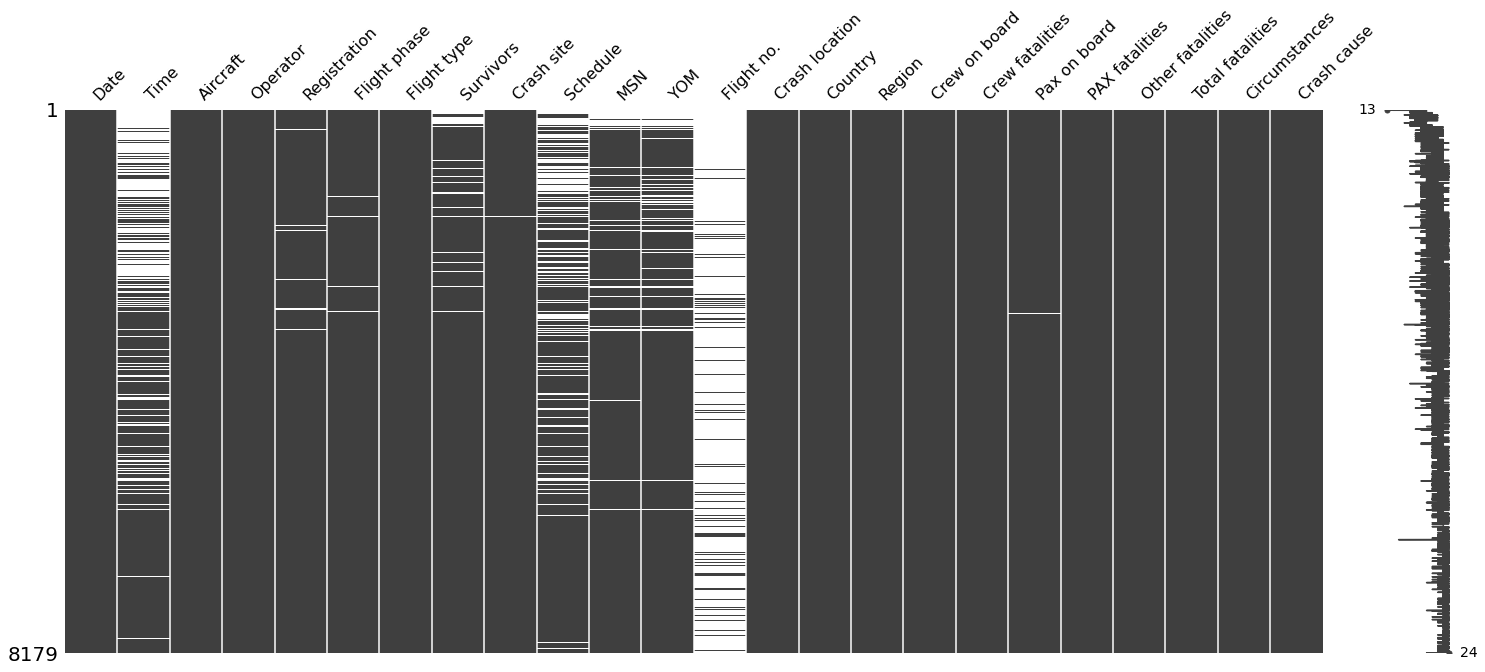

In [13]:
msno.matrix(DataNort.iloc[:, :25])

In [14]:
DataNort

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
13,1918-11-09,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-23130,NaN,Military,NaN,Airport (less than 10 km from airport),NaN,...,United States of America,North America,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed in unknown circumstances.,Unknown
14,1918-11-12,12H 0M 0S,De Havilland DH.4,United States Signal Corps - USSC,NaN,NaN,Military,NaN,NaN,NaN,...,United States of America,North America,NaN,0.0,NaN,0.0,0.0,0,NaN,Unknown
15,1918-11-12,NaN,De Havilland DH.4,United States Signal Corps - USSC,SC-39168,Flight,Training,Yes,Airport (less than 10 km from airport),NaN,...,United States of America,North America,2.0,1.0,0.0,0.0,0.0,1,The crew was completing a training mission. At...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28426,2022-04-02,11H 19M 0S,Learjet 75,Georgia Crown Distributing Company,N877W,Landing (descent or approach),Executive/Corporate/Business,Yes,Airport (less than 10 km from airport),Atlanta  Morristown,...,United States of America,North America,2.0,0.0,2.0,0.0,0.0,0,Following an uneventful flight from Atlanta-Fu...,Unknown
28431,2022-04-13,8H 32M 0S,Cessna 208B Grand Caravan,GEM Air,N928JP,Landing (descent or approach),Cargo,No,City,Salt Lake City  Burley,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,The single engine airplane departed Salt Lake ...,Unknown
28433,2022-04-21,19H 5M 0S,Cessna 340,Nixon Enterprises,N84GR,Takeoff (climb),Executive/Corporate/Business,No,City,NaN,...,United States of America,North America,1.0,1.0,1.0,1.0,0.0,2,Shortly after takeoff from Covington Airport R...,Unknown
28435,2022-05-06,14H 18M 0S,Cessna 421C Golden Eagle III,Private Mexican,XB-FQS,Takeoff (climb),Private,Yes,Airport (less than 10 km from airport),Houston - McAllen,...,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,While taking off from Houston-William P. Hobby...,Technical failure


In [47]:
DataNort["Date"]=pd.to_datetime(DataNort["Date"])

In [16]:
DataNort["weekNumber"] = DataNort["Date"].dt.isocalendar().week


/tmp/ipykernel_10924/2876718233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataNort["weekNumber"] = DataNort["Date"].dt.isocalendar().week


In [19]:
DataNort2=DataNort.copy()

In [20]:
DataNort.shape

(8179, 25)

In [21]:
DataNort2.shape

(8179, 25)

In [22]:
DataNort2=DataNort2.set_index("Date")

In [88]:
DataNort2.monthdayscalendar()

AttributeError: 'DataFrame' object has no attribute 'monthdayscalendar'

,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,...,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause,weekNumber
Date,,,,,,,,,,,,,,,,,,,,,
1918-05-05,None,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,None,...,North America,2.0,2.0,0.0,0.0,0.0,2.0,The single engine airplane departed Dayton-McC...,Technical failure,18
1918-05-12,None,None,None,None,None,None,None,None,None,None,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,<NA>
1918-05-19,None,None,None,None,None,None,None,None,None,None,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,<NA>
1918-05-26,None,None,None,None,None,None,None,None,None,None,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,<NA>
1918-06-02,None,None,None,None,None,None,None,None,None,None,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-10,None,None,None,None,None,None,None,None,None,None,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,<NA>
2022-04-17,8H 32M 0S,Cessna 208B Grand Caravan,GEM Air,N928JP,Landing (descent or approach),Cargo,No,City,Salt Lake City  Burley,208B-2428,...,North America,1.0,1.0,0.0,0.0,0.0,1.0,The single engine airplane departed Salt Lake ...,Unknown,15
2022-04-24,19H 5M 0S,Cessna 340,Nixon Enterprises,N84GR,Takeoff (climb),Executive/Corporate/Business,No,City,None,340-0178,...,North America,1.0,1.0,1.0,1.0,0.0,2.0,Shortly after takeoff from Covington Airport R...,Unknown,16


In [80]:
import calendar

In [79]:
DataNort2

,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,...,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause,weekNumber
Date,,,,,,,,,,,,,,,,,,,,,
1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,NaN,...,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure,18
1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,NaN,...,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,25
1918-11-09,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-23130,NaN,Military,NaN,Airport (less than 10 km from airport),NaN,NaN,...,North America,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed in unknown circumstances.,Unknown,45
1918-11-12,12H 0M 0S,De Havilland DH.4,United States Signal Corps - USSC,NaN,NaN,Military,NaN,NaN,NaN,NaN,...,North America,NaN,0.0,NaN,0.0,0.0,0,NaN,Unknown,46
1918-11-12,NaN,De Havilland DH.4,United States Signal Corps - USSC,SC-39168,Flight,Training,Yes,Airport (less than 10 km from airport),NaN,NaN,...,North America,2.0,1.0,0.0,0.0,0.0,1,The crew was completing a training mission. At...,Unknown,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-02,11H 19M 0S,Learjet 75,Georgia Crown Distributing Company,N877W,Landing (descent or approach),Executive/Corporate/Business,Yes,Airport (less than 10 km from airport),Atlanta  Morristown,45-496,...,North America,2.0,0.0,2.0,0.0,0.0,0,Following an uneventful flight from Atlanta-Fu...,Unknown,13
2022-04-13,8H 32M 0S,Cessna 208B Grand Caravan,GEM Air,N928JP,Landing (descent or approach),Cargo,No,City,Salt Lake City  Burley,208B-2428,...,North America,1.0,1.0,0.0,0.0,0.0,1,The single engine airplane departed Salt Lake ...,Unknown,15
2022-04-21,19H 5M 0S,Cessna 340,Nixon Enterprises,N84GR,Takeoff (climb),Executive/Corporate/Business,No,City,NaN,340-0178,...,North America,1.0,1.0,1.0,1.0,0.0,2,Shortly after takeoff from Covington Airport R...,Unknown,16


In [75]:
semana

In [44]:
DataNort=DataNort.reset_index(drop=True)

In [55]:
DataNort

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
2,1918-11-09,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-23130,NaN,Military,NaN,Airport (less than 10 km from airport),NaN,...,United States of America,North America,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed in unknown circumstances.,Unknown
3,1918-11-12,12H 0M 0S,De Havilland DH.4,United States Signal Corps - USSC,NaN,NaN,Military,NaN,NaN,NaN,...,United States of America,North America,NaN,0.0,NaN,0.0,0.0,0,NaN,Unknown
4,1918-11-12,NaN,De Havilland DH.4,United States Signal Corps - USSC,SC-39168,Flight,Training,Yes,Airport (less than 10 km from airport),NaN,...,United States of America,North America,2.0,1.0,0.0,0.0,0.0,1,The crew was completing a training mission. At...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8174,2022-04-02,11H 19M 0S,Learjet 75,Georgia Crown Distributing Company,N877W,Landing (descent or approach),Executive/Corporate/Business,Yes,Airport (less than 10 km from airport),Atlanta  Morristown,...,United States of America,North America,2.0,0.0,2.0,0.0,0.0,0,Following an uneventful flight from Atlanta-Fu...,Unknown
8175,2022-04-13,8H 32M 0S,Cessna 208B Grand Caravan,GEM Air,N928JP,Landing (descent or approach),Cargo,No,City,Salt Lake City  Burley,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,The single engine airplane departed Salt Lake ...,Unknown
8176,2022-04-21,19H 5M 0S,Cessna 340,Nixon Enterprises,N84GR,Takeoff (climb),Executive/Corporate/Business,No,City,NaN,...,United States of America,North America,1.0,1.0,1.0,1.0,0.0,2,Shortly after takeoff from Covington Airport R...,Unknown
8177,2022-05-06,14H 18M 0S,Cessna 421C Golden Eagle III,Private Mexican,XB-FQS,Takeoff (climb),Private,Yes,Airport (less than 10 km from airport),Houston - McAllen,...,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,While taking off from Houston-William P. Hobby...,Technical failure
